In [3]:
from imutils import paths
import json
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from deepface import DeepFace
import matplotlib.pyplot as plt

In [72]:
imgpaths=list(paths.list_images("C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass"))

In [57]:
landmarks = ['class','angry','disgust','fear','happy','sad','surprise','neutral']
with open('sober_drunk_original_deepface.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [73]:
class_name = "3_Glass"

In [74]:
for x in imgpaths:
    analysis = DeepFace.analyze(img_path = x, actions = ["emotion"],enforce_detection=False)
    print(x)
    
    try:
        face_row = list(np.array([[analysis["emotion"]["angry"],analysis["emotion"]["disgust"], analysis["emotion"]["fear"], analysis["emotion"]["happy"],analysis["emotion"]["sad"],analysis["emotion"]["surprise"],analysis["emotion"]["neutral"]]]).flatten())    
        row = face_row
            
            # Append class name 
        row.insert(0, class_name)
            
            # Export to CSV
        with open('sober_drunk_original_deepface.csv', mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(row) 
            
    except:
        pass
    


C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img0_02_02.png
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img10_02_02.png
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img11_02_02.png
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img12_02_02.png
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img13_02_02.png
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img14_02_02.png
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img15_02_02.png
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img16_02_02.png
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img18_02_02.png
C:/Users/user/Deskto

In [65]:
face_row

['sober',
 7.600986957550049,
 3.247214780052743e-10,
 0.031238491646945477,
 36.26423180103302,
 13.214847445487976,
 0.004120115772821009,
 42.88457632064819]

In [57]:
analysis

{'emotion': {'angry': 2.1061941879452206e-05,
  'disgust': 3.72394708443327e-18,
  'fear': 3.2192081032139663e-10,
  'happy': 90.42192101478577,
  'sad': 1.196677645864952e-07,
  'surprise': 1.3414137356448919e-05,
  'neutral': 9.57804024219513},
 'dominant_emotion': 'happy',
 'region': {'x': 118, 'y': 42, 'w': 134, 'h': 134},
 'age': 28,
 'gender': 'Man',
 'race': {'asian': 1.2196630054622037e-10,
  'indian': 2.473779349773625e-10,
  'black': 6.554155511355052e-13,
  'white': 99.99837875385538,
  'middle eastern': 0.0002955516140550197,
  'latino hispanic': 0.0013174926855877844},
 'dominant_race': 'white'}

In [4]:
df = pd.read_csv('C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/sober_drunk_original_deepface.csv')

In [5]:
df.head()

,class,angry,disgust,fear,happy,sad,surprise,neutral
0,sober,8.496807e-05,7.776792e-14,3.033651e-04,0.000340,3.358758e-04,1.317602e-08,99.998939
1,sober,7.165791e-09,3.084231e-17,1.554209e-07,97.551292,6.229162e-07,1.889670e-03,2.446819
2,sober,2.106194e-05,3.723947e-18,3.219208e-10,90.421921,1.196678e-07,1.341414e-05,9.578040
3,sober,8.576462e-02,2.193029e-07,3.964093e-02,0.039095,2.588593e-01,1.984557e-03,99.574655
4,sober,2.960232e-05,2.356702e-16,2.228672e-04,0.000459,8.510997e-03,2.469814e-07,99.990779


In [77]:
df.tail()

,class,angry,disgust,fear,happy,sad,surprise,neutral
201,3_Glass,4.830785e-06,6.383348e-19,6.720601e-08,98.340118,6.893656e-10,1.659770e+00,0.000105
202,3_Glass,5.757993e-02,1.018456e-09,2.746499e-04,99.792480,6.275256e-06,3.848898e-02,0.111176
203,3_Glass,2.657903e-04,8.985085e-07,1.034190e-05,79.099762,2.205827e-03,1.153939e-05,20.897748
204,3_Glass,1.483851e-13,4.335347e-24,4.606575e-19,99.994934,1.921749e-12,6.370934e-10,0.005072
205,3_Glass,4.673470e-08,3.659805e-20,1.082072e-12,99.968779,5.388092e-09,5.972970e-04,0.030623


In [78]:
df[df['class']=='sober']

,class,angry,disgust,fear,happy,sad,surprise,neutral
0,sober,8.496807e-05,7.776792e-14,3.033651e-04,3.395713e-04,3.358758e-04,1.317602e-08,99.998939
1,sober,7.165791e-09,3.084231e-17,1.554209e-07,9.755129e+01,6.229162e-07,1.889670e-03,2.446819
2,sober,2.106194e-05,3.723947e-18,3.219208e-10,9.042192e+01,1.196678e-07,1.341414e-05,9.578040
3,sober,8.576462e-02,2.193029e-07,3.964093e-02,3.909518e-02,2.588593e-01,1.984557e-03,99.574655
4,sober,2.960232e-05,2.356702e-16,2.228672e-04,4.588762e-04,8.510997e-03,2.469814e-07,99.990779
5,sober,1.316084e-06,1.807558e-10,2.537036e-03,2.347027e+01,1.501173e-02,1.019980e-03,76.511161
6,sober,1.059968e-03,3.217626e-12,3.750339e-04,5.019174e-04,2.768237e-02,9.200887e-07,99.970382
7,sober,1.819160e-09,4.354752e-16,1.312896e-06,9.195867e-02,1.696454e-04,4.355170e-07,99.907875
8,sober,1.499813e-01,2.324918e-08,2.416203e+00,2.545633e-02,6.418253e+00,1.836266e-03,90.988272
9,sober,7.327765e-09,1.862213e-27,1.063644e-16,9.987454e+01,5.408634e-11,6.404416e-11,0.125458


In [79]:
df[df['class']=='3_Glass']

,class,angry,disgust,fear,happy,sad,surprise,neutral
155,3_Glass,3.253032e-03,1.070249e-12,9.198458e-04,1.135491e-04,7.054724e-03,1.310331e-05,9.998865e+01
156,3_Glass,3.504772e-04,1.980305e-07,9.972867e+01,2.585756e-01,1.078355e-02,1.621914e-03,1.770019e-06
157,3_Glass,1.955181e-05,1.819465e-17,6.582176e-08,9.999997e+01,5.388145e-07,1.952910e-10,1.089156e-05
158,3_Glass,3.028253e-08,8.142381e-21,1.219668e-04,4.303532e-15,9.999988e+01,2.799310e-26,1.062499e-06
159,3_Glass,6.009073e-06,2.492260e-12,6.035196e-05,5.048608e-01,3.207355e-04,3.826545e-04,9.949437e+01
160,3_Glass,4.371085e-04,2.261903e-09,6.291801e-02,4.634118e-02,9.954106e+01,2.226016e-02,3.269823e-01
161,3_Glass,1.901475e-04,4.330055e-10,1.390884e-02,6.585226e-14,9.998577e+01,2.732388e-19,1.355500e-04
162,3_Glass,1.868003e+01,1.620395e-06,6.217580e+01,1.496519e+01,4.156474e+00,2.221900e-02,2.794304e-04
163,3_Glass,6.464038e-05,4.764582e-13,1.482737e-06,8.658070e+01,1.388425e-02,2.180256e-05,1.340533e+01
164,3_Glass,2.541472e-03,2.065721e-09,2.790348e-07,9.999334e+01,6.225696e-07,1.481243e-06,4.124725e-03


In [80]:
c=df['class']
d=df['sad']

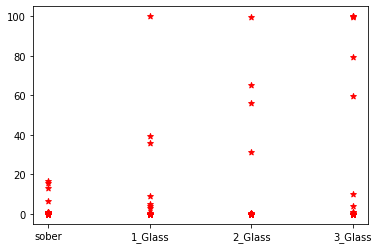

In [81]:
plt.scatter(c,d,marker='*',color='red')

In [82]:
x = df.drop('class', axis=1)
y = df['class']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

In [85]:
X_train.shape

(144, 7)

In [86]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [87]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [88]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [89]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [90]:
fit_models['rf'].predict(X_test)

array(['1_Glass', '1_Glass', 'sober', '2_Glass', 'sober', '3_Glass',
       '1_Glass', '1_Glass', 'sober', '1_Glass', '1_Glass', '2_Glass',
       'sober', '2_Glass', '3_Glass', '3_Glass', '3_Glass', 'sober',
       '1_Glass', 'sober', '3_Glass', '3_Glass', 'sober', '1_Glass',
       '1_Glass', 'sober', '3_Glass', '2_Glass', '1_Glass', '2_Glass',
       '2_Glass', 'sober', '1_Glass', 'sober', 'sober', 'sober',
       '3_Glass', 'sober', '1_Glass', '2_Glass', '1_Glass', '2_Glass',
       '1_Glass', '1_Glass', 'sober', '1_Glass', 'sober', '1_Glass',
       '3_Glass', '3_Glass', 'sober', '1_Glass', '3_Glass', '3_Glass',
       'sober', 'sober', '3_Glass', '3_Glass', '3_Glass', '1_Glass',
       '1_Glass', '1_Glass'], dtype=object)

In [91]:
from sklearn.metrics import accuracy_score
import pickle

In [92]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    yhattrain = model.predict(X_train)
    print("train_Accuracy",algo, accuracy_score(y_train, yhattrain))
    print("test_Accuracy",algo, accuracy_score(y_test, yhat))
    
    print(".")

train_Accuracy lr 0.3819444444444444
test_Accuracy lr 0.3548387096774194
.
train_Accuracy rf 0.9861111111111112
test_Accuracy rf 0.25806451612903225
.
train_Accuracy gb 0.9861111111111112
test_Accuracy gb 0.25806451612903225
.


In [93]:
with open('sober_drunk_original_deepface.pkl','wb') as f:
    pickle.dump(fit_models['rf'],f)

In [94]:
with open('sober_drunk_original_deepface.pkl','rb') as f:
    model=pickle.load(f)

In [95]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
#Just doing prediction on a set

In [96]:
imgpaths=list(paths.list_images("C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass"))

In [97]:
for x in imgpaths:
    analysis = DeepFace.analyze(img_path = x, actions = ["emotion"],enforce_detection=False)
    print(x)
    
    try:
        face_row = list(np.array([[analysis["emotion"]["angry"],analysis["emotion"]["disgust"], analysis["emotion"]["fear"], analysis["emotion"]["happy"],analysis["emotion"]["sad"],analysis["emotion"]["surprise"],analysis["emotion"]["neutral"]]]).flatten())    
        row = face_row
            
        data=pd.DataFrame([row])
        output_class=model.predict(data)[0]
        output_probability=model.predict_proba(data)[0]
        print(output_class,output_probability)
    except:
        pass
    


C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img0_02_02.png
sober [0.17 0.08 0.08 0.67]
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img10_02_02.png
3_Glass [0.06 0.11 0.71 0.12]
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img11_02_02.png
3_Glass [0.01666688 0.10408087 0.87713366 0.00211859]
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img12_02_02.png
3_Glass [0.09 0.11 0.75 0.05]
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img13_02_02.png
sober [0.31 0.27 0.03 0.39]
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img14_02_02.png
3_Glass [0.11 0.19 0.63 0.07]
C:/Users/user/Desktop/4pilot/sober-drunk/4Pilots_Final/sober_drunk_original_deepface/3_Glass\img15_02_02.png
1_Glass [0.55 0.17 0.25 0.03]
C:/Users